<h2 style="color:crimson">Respuestas Tarea 2</h2>

1. Declara la variable `cemex_close` siendo esta la columna `PX_LAST` dentro del DataFrame `bmv`; transforma el índice de `cemex_close` a fin de que sea un `DateTimeIndex`; posteriormente, declara la variable `cemex_diff` que contenga la diferencia de precios entre un día y el siguiente (**hint**: ocupa el método `shift`)

Crea una figure usando matplotlib con 2 columnas: la primera columna deberá ser el histórico de `cemex_diff`; la segunda columna, un histograma de `cemex_diff` con `bins=20`.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#Se abre el archivo csv y se visualiza
bmv = pd.read_csv("../files/lec02/ipc0019.csv")
bmv.head()

,date,ticker,field,value
0,2017-06-07,BBAJIOO MF Equity,PX_LAST,29.50
1,2017-06-08,BBAJIOO MF Equity,PX_LAST,30.14
2,2017-06-08,BBAJIOO MF Equity,PX_LOW,29.75
3,2017-06-08,BBAJIOO MF Equity,PX_OPEN,29.50
4,2017-06-08,BBAJIOO MF Equity,PX_HIGH,30.70


In [3]:
#Se genera una tabla pivote
bmv = bmv.pivot_table(values="value",
                      index="date",
                      columns=["ticker", "field"])
bmv.head()

ticker     1746531D GZ Equity                                          \
field                 PX_HIGH PX_LAST PX_LOW PX_MID PX_OPEN PX_VOLUME   
date                                                                    
2000-01-03                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-04                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-05                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-06                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-07                NaN     NaN    NaN    NaN     NaN       NaN   

ticker     AC* MF Equity                        ... TLEVICPO MF Equity         \
field            PX_HIGH PX_LAST PX_LOW PX_MID  ...             PX_LOW PX_MID   
date                                            ...                             
2000-01-03           NaN     NaN    NaN    NaN  ...              30.44  30.50   
2000-01-04           NaN     NaN    NaN    NaN  ...              27.30  27.45   
2000-01-05           NaN     NaN    NaN    NaN  ...              25.90  27.15   
2000-01-06           NaN     NaN    NaN    NaN  ...              27.00  27.08   
2000-01-07           NaN     NaN    NaN    NaN  ...              26.75  28.35   

ticker                        WALMEX* MF Equity                                \
field      PX_OPEN  PX_VOLUME           PX_HIGH PX_LAST PX_LOW PX_MID PX_OPEN   
date                                                                            
2000-01-03   32.20   680000.0              5.14    4.90   4.75   4.89    4.78   
2000-01-04   28.80  2980000.0              4.83    4.82   4.73   4.83    4.80   
2000-01-05   26.80  3430000.0              5.25    5.21   4.70   5.30    4.80   
2000-01-06   27.30   850000.0              5.34    5.18   5.13   5.18    5.24   
2000-01-07   26.98  2210000.0              5.63    5.51   5.19   5.69    5.19   

ticker                  
field        PX_VOLUME  
date                    
2000-01-03  17132000.0  
2000-01-04  20296000.0  
2000-01-05  20372000.0  
2000-01-06  22904000.0  
2000-01-07  23512000.0  

[5 rows x 210 columns]

In [4]:
#Se toma la tabla "CEMEXCPO MF Equity" 
cemex = "CEMEXCPO MF Equity"
cemex_close = bmv[cemex]
cemex_close.head()

field,PX_HIGH,PX_LAST,PX_LOW,PX_MID,PX_OPEN,PX_VOLUME
date,,,,,,
2000-01-03,8.46,8.14,8.09,8.14,8.35,8755188.0
2000-01-04,7.89,7.62,7.61,7.61,7.86,26017417.0
2000-01-05,7.70,7.61,7.45,7.65,7.61,39735576.0
2000-01-06,7.71,7.50,7.43,7.50,7.65,14939813.0
2000-01-07,7.59,7.58,7.48,7.58,7.54,46276516.0


In [5]:
#se genera la variable cemex_last con la columna PX_LAST
cemex_last=cemex_close.PX_LAST
cemex_last

date
2000-01-03    8.14
2000-01-04    7.62
2000-01-05    7.61
2000-01-06    7.50
2000-01-07    7.58
              ... 
2019-09-20    7.98
2019-09-23    7.84
2019-09-24    7.79
2019-09-25    7.78
2019-09-26    7.77
Name: PX_LAST, Length: 4983, dtype: float64

In [6]:
#Se generan los indices para cemex_last
date_index = pd.to_datetime(cemex_last.index,format=None) #cambiar a una fecha en una copia
date_index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-09-12', '2019-09-13', '2019-09-17', '2019-09-18',
               '2019-09-19', '2019-09-20', '2019-09-23', '2019-09-24',
               '2019-09-25', '2019-09-26'],
              dtype='datetime64[ns]', name='date', length=4983, freq=None)

In [7]:
# Asignamos una nueva serie de índices para cemex_last
cemex_last.index = date_index
cemex_last.head()


date
2000-01-03    8.14
2000-01-04    7.62
2000-01-05    7.61
2000-01-06    7.50
2000-01-07    7.58
Name: PX_LAST, dtype: float64

In [8]:
#Se calcula la diferencia de los valores de cemex_last 
cemex_diff=cemex_last - cemex_last.shift(1)
cemex_diff

date
2000-01-03     NaN
2000-01-04   -0.52
2000-01-05   -0.01
2000-01-06   -0.11
2000-01-07    0.08
              ... 
2019-09-20    0.22
2019-09-23   -0.14
2019-09-24   -0.05
2019-09-25   -0.01
2019-09-26   -0.01
Name: PX_LAST, Length: 4983, dtype: float64

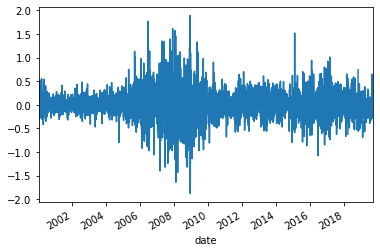

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


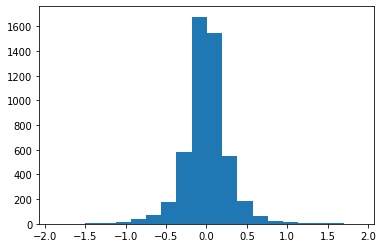

In [9]:
# Se generaran dos graficas, el historico y un histograma de cemex_diff.  
graf_1=cemex_diff.plot()
plt.show()

graf_2=plt.hist(cemex_diff,bins=20);
plt.show()


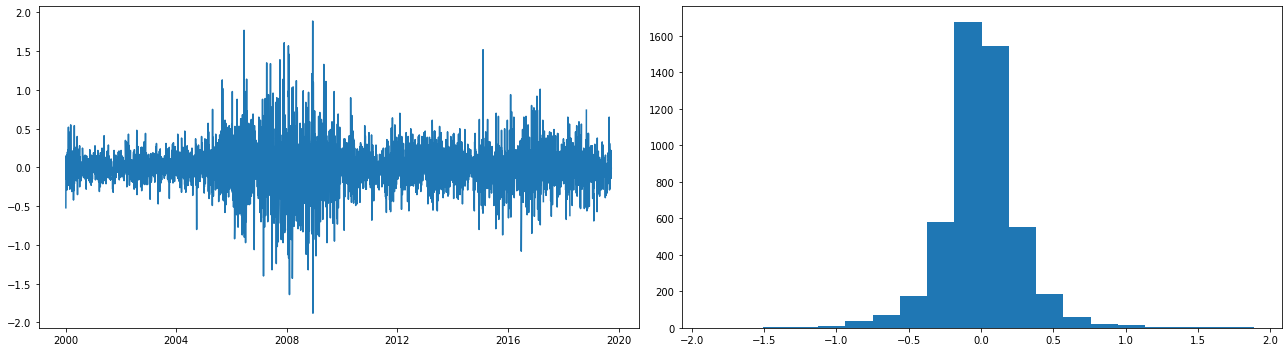

In [10]:
# Se generaran dos graficas, el historico y un histograma de cemex_diff en dos columnas.  

fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(18,5))
axes[0].plot(cemex_diff)
axes[1].hist(cemex_diff,bins=20)
fig.tight_layout()

----

2. Realiza un _downsampling_ de `cemex_diff`: calcula la desviación estándar por trimestre del inicio de la historia hasta el 1 de junio de 2018. Guarda la información dentro la variable `cemex_std` y grafica un histograma con `bins=20`


In [11]:
# Agrupando valores por trimestre (Iinicial), calculando la desviación estándar.
cemex_remp=cemex_diff.loc[:"2018-06-01"]
cemex_std=cemex_remp.resample("Q",label='left',closed='left').std()
cemex_std

date
1999-12-31    0.206995
2000-03-31    0.166336
2000-06-30    0.110740
2000-09-30    0.104560
2000-12-31    0.115343
                ...   
2017-03-31    0.216523
2017-06-30    0.221147
2017-09-30    0.215186
2017-12-31    0.258683
2018-03-31    0.196043
Freq: Q-DEC, Name: PX_LAST, Length: 74, dtype: float64

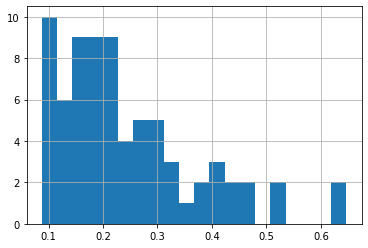

In [12]:
#Se genera un histograma
plt.hist(cemex_std,bins=20);
plt.grid()


---

3. Realiza nuevamente el ejercicio 3 calculando en este caso la desviación estándar por semana. ¿Qué diferencias observas entre las dos distribuciones de volatilidad?


In [13]:
# Agrupando valores por semana (inicial), con desviación estándar
cemex_remp=cemex_diff.loc[:"2018-06-01"]
cemex_std=cemex_remp.resample("W",label='left',closed='left').std()
cemex_std

date
2000-01-02    0.264953
2000-01-09    0.130958
2000-01-16    0.155981
2000-01-23    0.202682
2000-01-30    0.146390
                ...   
2018-04-29    0.157348
2018-05-06    0.182839
2018-05-13    0.217601
2018-05-20    0.129923
2018-05-27    0.100100
Freq: W-SUN, Name: PX_LAST, Length: 961, dtype: float64

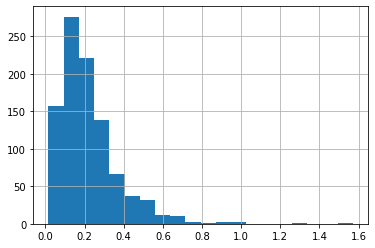

In [14]:
#Se genera un histograma
plt.hist(cemex_std,bins=20);
plt.grid()


¿Qué diferencias observas entre las dos distribuciones de volatilidad?

En la agrupación por trimestre se pierde información, en cambio en la gráfica por semana sí se muestra. Pero para eficientar procesos puede ser de mucha ayuda la gráfica trimestral, dado que ambas gráficas dan un bosquejo parecido del comportamiento de los datos.

---

4. En este ejercicio analizaremos la volatilidad por mes considerando `cemex_diff`. Corre el siguiente código y explica que hace:

```python
months = cemex_diff.index.strftime("%B")
cemex_diff.groupby(months).mean().plot(kind="bar")
```

¿Cómo podrías explicar la gráfica resultante?



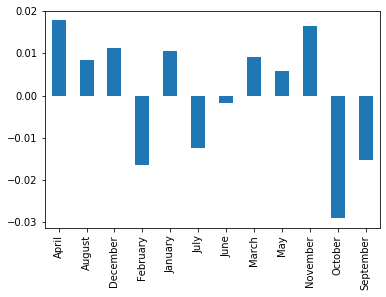

In [15]:
#Agrupando valores por mes sobre la media.
#La diferencia de los precios de un día y el siguiente (cemex_diff) se convierte el indice de fechas en Meses (strftime).
months = cemex_diff.index.strftime("%B")
#Se genera una gráfica con la media de los valores de cemex_diff con respecto a los meses, king="bar" gráfica las barras 
cemex_diff.groupby(months).mean().plot(kind="bar")

¿Cómo podrías explicar la gráfica resultante? 

La gráfica representa el promedio mensual de la volatilidad que hay en la diferencia de los precios entre un día y el siguiente, con esto se observa que disminuye la volatilidad en los meses de Febrero, Julio, Octubre y Septiembre. 

---

5. Realiza nuevamente el ejercicio 4 considerando `cemexs_last`. ¿Por qué difieren las gráficas?


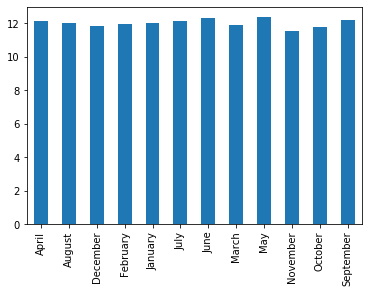

In [16]:
months = cemex_last.index.strftime("%B")
cemex_last.groupby(months).mean().plot(kind="bar")

¿Por qué difieren las gráficas?

La primer gráfica representa el promedio mensual de la volatilidad de cemex_diff (la diferencia de los precios entre un día y el siguiente), se observa que disminuye la volatilidad en los meses de Febrero, Julio, Octubre y Septiembre. 

La segunda gráfica representa el promedio mensual de los precios de cada día.

La diferencia que se tiene es que en una calculamos la volatilidad que existe sobre la diferencia de los precios de un día y el siguiente  y la otra sólo se muestra la media de los valores por mes.